In [237]:
import re
from collections import Counter
from nltk.tokenize import word_tokenize
import seaborn as sns
import scipy.stats as stats
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [238]:
dstring = "As a term, data analytics predominantly refers to an assortment of applications, from basic business \nintelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced \nanalytics . In that sense, it's similar in nature to business analytics , another umbrella term for \napproaches to analyzing data -- with the difference that the latter is oriented to business uses, while \ndata analytics has a broader focus. The expansive view of the term isn't universal, though: In some \ncases, people use data analytics specifically to mean advanced analytics , treating BI as a separate \ncategory. Data analytics initiatives can help businesses increase revenues, improve operational \nefficiency, optimize marketing campaigns and customer service efforts, respond more quickly to \nemerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of \nboosting business performance. Depending on the particular application, the data that's analyzed \ncan consist of either historical records or new information that has been processed for real-time \nanalytics uses. In addition, it can come from a mix of internal systems and external data sources. At \na high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find \npatterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical \ntechniques to determine whether hypotheses about a data set are true or false. EDA is often \ncompared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a \ndistinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis . Data \nanalytics can also be separated into quantitative data analysis and qualitative data analysis . The \nformer involves analysis of numerical data with quantifiable variables that can be compared or \nmeasured statistically. The qualitative approach is more interpretive -- it focuses on understanding \nthe content of non-numerical data like text, images, audio and video, including common phrases, \nthemes and points of view."

In [239]:
print(dstring)

As a term, data analytics predominantly refers to an assortment of applications, from basic business 
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced 
analytics . In that sense, it's similar in nature to business analytics , another umbrella term for 
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while 
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some 
cases, people use data analytics specifically to mean advanced analytics , treating BI as a separate 
category. Data analytics initiatives can help businesses increase revenues, improve operational 
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to 
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of 
boosting business performance. Depending on the particular application, the data that's analyzed 
ca

### a. What is the probability of the word “data” occurring in each line ?

In [240]:
# Convert each word to lowercase
dstring = dstring.lower()

# Split words into List
wordlist = dstring.split()

# Split sentences into List
linelist = dstring.splitlines()

In [241]:
d = {}

for word in wordlist:
    d[word] = d.get(word, 0) + 1
    word.replace(',','').replace('.','')

In [242]:
d

{'as': 2,
 'a': 10,
 'term,': 1,
 'data': 17,
 'analytics': 10,
 'predominantly': 1,
 'refers': 1,
 'to': 11,
 'an': 1,
 'assortment': 1,
 'of': 10,
 'applications,': 1,
 'from': 2,
 'basic': 1,
 'business': 4,
 'intelligence': 1,
 '(bi),': 1,
 'reporting': 1,
 'and': 9,
 'online': 1,
 'analytical': 1,
 'processing': 1,
 '(olap)': 1,
 'various': 1,
 'forms': 1,
 'advanced': 2,
 '.': 3,
 'in': 6,
 'that': 4,
 'sense,': 1,
 "it's": 1,
 'similar': 1,
 'nature': 1,
 ',': 2,
 'another': 1,
 'umbrella': 1,
 'term': 2,
 'for': 2,
 'approaches': 1,
 'analyzing': 1,
 '--': 4,
 'with': 3,
 'the': 11,
 'difference': 1,
 'latter': 1,
 'is': 4,
 'oriented': 1,
 'uses,': 1,
 'while': 2,
 'has': 2,
 'broader': 1,
 'focus.': 1,
 'expansive': 1,
 'view': 1,
 "isn't": 1,
 'universal,': 1,
 'though:': 1,
 'some': 1,
 'cases,': 1,
 'people': 1,
 'use': 1,
 'specifically': 1,
 'mean': 1,
 'treating': 1,
 'bi': 1,
 'separate': 1,
 'category.': 1,
 'initiatives': 1,
 'can': 5,
 'help': 1,
 'businesses': 1,
 

In [243]:
data = d['data']
print("Word count of 'data': ", data)

line_list_number = len(linelist)
print("Number of lines: ", line_list_number)

Word count of 'data':  17
Number of lines:  22


In [244]:
dataprob = data/(len(linelist))
dataprob

0.7727272727272727

Probability of the word “data” occurring in each line is 0.77.

### b. What is the distribution of distinct word counts across all the lines ?

In [245]:
def tokenize(string):
    return re.compile('\w+').findall(string)

def freq(string):
    text = tokenize(string.lower())
    d = Counter(' '.join(text))
    c = Counter(text)
    return (dict(c))

def returnfreq(string):
    text = tokenize(string.lower())
    d = Counter(' '.join(text))
    c = Counter(text)
    return (dict(c), dict(d))

In [246]:
words = freq(dstring)
words, letters = returnfreq(dstring)

In [247]:
distinct_word = []

In [248]:
for line in linelist:
    distinct_word.append(len(freq(line)))
    
print(distinct_word)

[15, 13, 14, 14, 17, 14, 11, 12, 16, 12, 16, 18, 14, 11, 16, 17, 15, 12, 14, 12, 15, 5]


/Users/yeeyiengjellybean/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yeeyiengjellybean/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


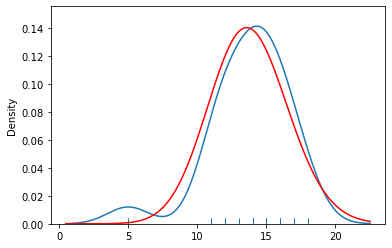

In [249]:
sns.distplot(distinct_word, fit_kws={"color":"red"}, fit=stats.gamma, kde=True, hist=None, rug=True);

The distribution of distinct word counts across all the lines is normal.

### c. What is the probability of the word “analytics” occurring after the word “data” ?

In [250]:
bigram_word = re.findall('\w+', dstring)
bigram_count = Counter(zip(bigram_word,bigram_word[1:]))

In [251]:
data_acount = bigram_count[('data', 'analytics')]

analytics = d['analytics']

print("Number of Data Analytics: ", data_acount)
print("Number of analytics: ", analytics)

Number of Data Analytics:  6
Number of analytics:  10


In [252]:
anaprob = (data_acount/analytics)
anaprob

0.6

Probability of the word “data” occurring in each line is 0.6.